# Aquisição e Leitura de Dados Reais

## Produção hospitalar e Pandas

Exploração dos dados do datasus 2008 em diante.
Dados extraídos de http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def


In [1]:
import pandas as pd

In [2]:
arquivo_dados = "arquivo_dados.csv"

`dados = pd.read_csv(arquivo_dados)` resultará em erro.

Muitos locais utilizam padrão de encoding ISO-8859-1, portanto devemos especificar durante abertura do arquivo:

`dados = pd.read_csv(arquivo_dados, encoding = "ISO-8859-1")`, porém resultará no seguinte erro:

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 154


Não foi possível tokenizar os dados, pois o arquivo é separado por ponto e vírgulaao invés de vírgulas.
Nosso arquivo possui algumas linhas que não são dados.

In [3]:
dados = pd.read_csv(arquivo_dados, encoding = "ISO-8859-1", skiprows = 3, sep = ";")

skiprows pula linhas do arquivo.

In [4]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63",...,"8085025,66","9221412,18","7493310,88","8092260,11","7273843,63","7652120,28","8725530,68","11152107,08","10285455,78","929129659,72"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53",...,"2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20",-,"420668039,63"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35",...,"14346553,60","16018459,07","14913745,37","15068304,35","13509579,29","19658585,46","20897542,93","19346450,18","14726443,67","1771654871,23"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18","910424,17",...,"3097113,21","3059823,80","2912519,98","2937346,43","2868820,96","2752228,26","3401864,29","3015488,30","2826486,18","305010883,18"
4,15 Pará,"18864744,11","19553758,20","21937342,70","20842829,69","23249952,88","23240687,56","24002223,56","23341218,03","25172261,32",...,"35925899,01","34345207,63","37384336,94","35512568,15","28217249,66","32617541,05","41625331,28","38438873,79","39911193,02","4437115730,71"
5,16 Amapá,"1120973,34","1268740,33","974651,24","1141137,32","866346,18","1440978,95","1426659,48","1475551,38","1651341,43",...,"2296699,42","2333822,65","2310195,65","1842472,54","1705873,64","2065055,35","2009912,57","3249565,87","2942273,94","291637984,75"
6,17 Tocantins,"3441592,69","4985688,85","6205612,60","4984482,09","5511002,46","4927934,22","5445602,28","5413710,38","5596669,50",...,"7210731,09","8096781,90","7022324,92","7209045,59","6390358,03","6697839,73","7384806,71","9131707,60","8240261,38","999998621,85"
7,21 Maranhão,"10723506,39","13559679,41","13985142,36","14809416,46","14505727,38","14908091,32","15784899,40","15195312,89","14951277,75",...,"29445106,74","30003061,50","29680064,33","28779088,94","24792925,68","30512523,70","33099356,79","32936503,37","28587541,78","3632860959,84"
8,22 Piauí,"7985142,43","10079928,25","10298372,45","10775976,33","10398360,88","10528253,88","11040107,92","10549176,40","10899198,97",...,"17641837,23","16229473,38","16851334,11","14568254,23","12224393,97","12658280,69","14547134,38","17871598,61","23210624,20","2130616492,35"
9,23 Ceará,"15539821,90","25735101,55","28724625,75","30676457,06","30604453,47","31272395,18","30925391,36","27851438,72","30362719,90",...,"50834117,85","50622973,33","50719494,87","46991314,91","44964787,45","46197393,28","54409441,05","55180751,48","59808605,59","6197357245,98"


Podemos verificar que o rodapé do arquivo também não é composto de dados.
Com isso adicionaremos um comando para evitar as linhas do rodapé: "skipfooter"

In [5]:
dados = pd.read_csv(arquivo_dados, encoding = "ISO-8859-1", skiprows = 3, sep = ";", skipfooter = 12)

C:\Users\fcfab\Anaconda3\envs\tf_gpu3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63",...,"8085025,66","9221412,18","7493310,88","8092260,11","7273843,63","7652120,28","8725530,68","11152107,08","10285455,78","929129659,72"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53",...,"2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20",-,"420668039,63"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35",...,"14346553,60","16018459,07","14913745,37","15068304,35","13509579,29","19658585,46","20897542,93","19346450,18","14726443,67","1771654871,23"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18","910424,17",...,"3097113,21","3059823,80","2912519,98","2937346,43","2868820,96","2752228,26","3401864,29","3015488,30","2826486,18","305010883,18"
4,15 Pará,"18864744,11","19553758,20","21937342,70","20842829,69","23249952,88","23240687,56","24002223,56","23341218,03","25172261,32",...,"35925899,01","34345207,63","37384336,94","35512568,15","28217249,66","32617541,05","41625331,28","38438873,79","39911193,02","4437115730,71"
5,16 Amapá,"1120973,34","1268740,33","974651,24","1141137,32","866346,18","1440978,95","1426659,48","1475551,38","1651341,43",...,"2296699,42","2333822,65","2310195,65","1842472,54","1705873,64","2065055,35","2009912,57","3249565,87","2942273,94","291637984,75"
6,17 Tocantins,"3441592,69","4985688,85","6205612,60","4984482,09","5511002,46","4927934,22","5445602,28","5413710,38","5596669,50",...,"7210731,09","8096781,90","7022324,92","7209045,59","6390358,03","6697839,73","7384806,71","9131707,60","8240261,38","999998621,85"
7,21 Maranhão,"10723506,39","13559679,41","13985142,36","14809416,46","14505727,38","14908091,32","15784899,40","15195312,89","14951277,75",...,"29445106,74","30003061,50","29680064,33","28779088,94","24792925,68","30512523,70","33099356,79","32936503,37","28587541,78","3632860959,84"
8,22 Piauí,"7985142,43","10079928,25","10298372,45","10775976,33","10398360,88","10528253,88","11040107,92","10549176,40","10899198,97",...,"17641837,23","16229473,38","16851334,11","14568254,23","12224393,97","12658280,69","14547134,38","17871598,61","23210624,20","2130616492,35"
9,23 Ceará,"15539821,90","25735101,55","28724625,75","30676457,06","30604453,47","31272395,18","30925391,36","27851438,72","30362719,90",...,"50834117,85","50622973,33","50719494,87","46991314,91","44964787,45","46197393,28","54409441,05","55180751,48","59808605,59","6197357245,98"


Mostrar apenas cabeçalho:

In [7]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63",...,"8085025,66","9221412,18","7493310,88","8092260,11","7273843,63","7652120,28","8725530,68","11152107,08","10285455,78","929129659,72"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53",...,"2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20",-,"420668039,63"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35",...,"14346553,60","16018459,07","14913745,37","15068304,35","13509579,29","19658585,46","20897542,93","19346450,18","14726443,67","1771654871,23"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18","910424,17",...,"3097113,21","3059823,80","2912519,98","2937346,43","2868820,96","2752228,26","3401864,29","3015488,30","2826486,18","305010883,18"
4,15 Pará,"18864744,11","19553758,20","21937342,70","20842829,69","23249952,88","23240687,56","24002223,56","23341218,03","25172261,32",...,"35925899,01","34345207,63","37384336,94","35512568,15","28217249,66","32617541,05","41625331,28","38438873,79","39911193,02","4437115730,71"


Mostrar apenas final da planilha:

In [8]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30",...,"90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86051002,13","100531035,83","101374341,51","11958647088,33"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05",...,"17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17331445,92","18755557,92","19241624,02","2172157981,36"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89",...,"15029205,51","15249241,20","15046851,63","14886817,29","12546999,04","13604225,34","13151005,63","16371639,49","17790649,87","2036923784,59"
25,52 Goiás,"15310637,29","22258668,68","21442515,75","20921212,45","21615970,67","18270043,87","20540517,13","20650730,67","20868443,56",...,"34873099,14","35775375,69","35005746,36","34793993,14","30896577,34","34305180,56","35701473,15","39405050,36","43984702,05","4657350310,70"
26,53 Distrito Federal,"4745919,19","7632480,67","9647203,26","11098732,99","12891719,72","12850125,67","12565646,74","13710857,89","13165106,20",...,"18769437,77","22341629,09","20643441,06","22947163,99","21536505,16","19058243,91","22704335,27","25269773,34","26526196,39","2429933198,76"


Podemos verificar que os dados da tabela são compostos por strings e não por números, já que os números são separados por vírgula ao invés de ponto.
Devemos ler o arquivo indicando que o separador é vírgula.

In [9]:
dados = pd.read_csv(arquivo_dados, encoding = "ISO-8859-1", skiprows = 3, sep = ";", skipfooter = 12,
                   thousands = ".", decimal = ",")
dados.head()

C:\Users\fcfab\Anaconda3\envs\tf_gpu3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


In [10]:
#imprimir a média
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


Vamos configurar o pandas para exibir números com apenas duas casas decimais e evitar notação científica:

In [12]:
pd.options.display.float_format = "{:.2f}".format

In [13]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

Como selecionar um único valor dentro do dataframe?

    Exemplo: Agosto/2008 - dados["2008/Ago"] retornará uma série. 

In [14]:
dados["2008/Ago"]

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [15]:
dados["2008/Ago"].mean()

27800320.306666665

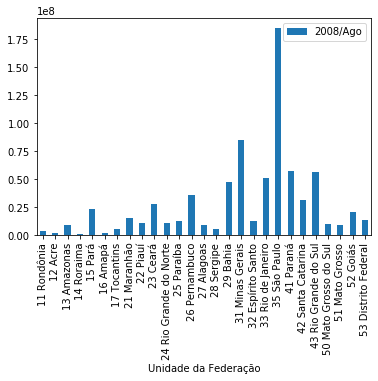

In [16]:
dados.plot(x="Unidade da Federação", y = "2008/Ago", kind="bar")

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

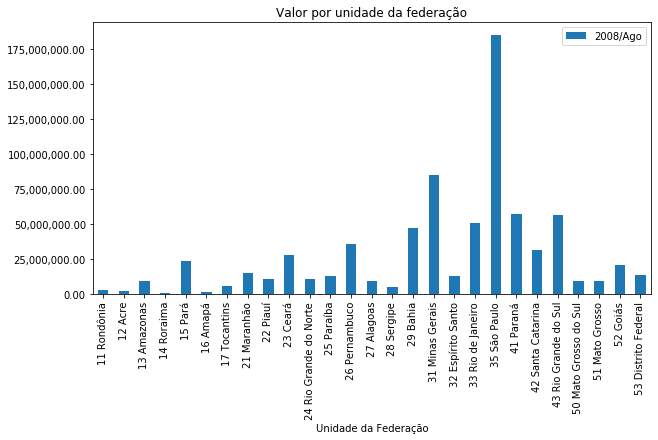

In [18]:
#axis
ax = dados.plot(x="Unidade da Federação", y = "2008/Ago", kind="bar", figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

## Desafio01: escolher um título mais descritivo que passe a mensagem adequada

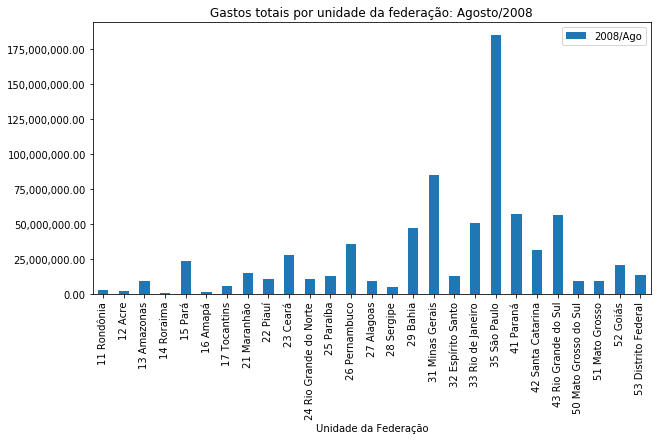

In [19]:
#axis
ax = dados.plot(x="Unidade da Federação", y = "2008/Ago", kind="bar", figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos totais por unidade da federação: Agosto/2008")
plt.show()

## Desafio02: faça a mesma análise para o mês mais recente

In [20]:
dados["2020/Ago"].unique()

array(['10285455.78', '-', '14726443.67', '2826486.18', '39911193.02',
       '2942273.94', '8240261.38', '28587541.78', '23210624.20',
       '59808605.59', '24929930.72', '22130016.81', '75704177.72',
       '19754741.78', '11014180.89', '80793117.08', '168024412.95',
       '32188873.88', '95274486.35', '346512263.17', '129375911.54',
       '63972379.36', '101374341.51', '19241624.02', '17790649.87',
       '43984702.05', '26526196.39'], dtype=object)

In [21]:
dados["2020/Ago"] = pd.to_numeric(dados["2020/Ago"], errors='coerce')
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71


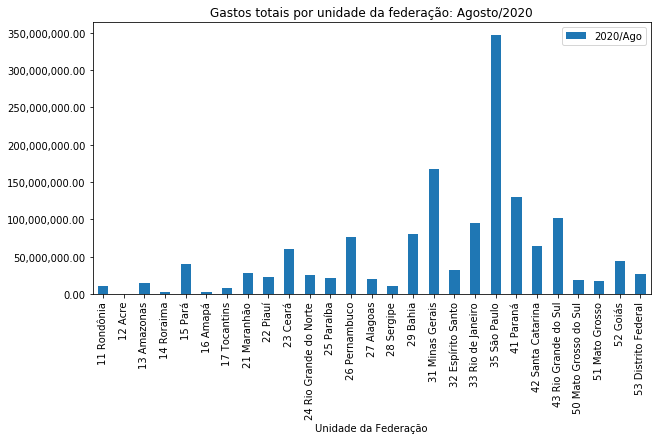

In [22]:
#axis
ax = dados.plot(x="Unidade da Federação", y = "2020/Ago", kind="bar", figsize=(10,5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos totais por unidade da federação: Agosto/2020")
plt.show()

## Gráficos

Utilizando arquivo de data de processamento dos pagamentos:

In [23]:
dados2 = pd.read_csv(arquivo_dados, encoding = "ISO-8859-1", skiprows = 3, sep = ";", skipfooter = 12,
                   thousands = ".", decimal = ",")
dados2.head()

C:\Users\fcfab\Anaconda3\envs\tf_gpu3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4437115730.71


In [24]:
dados2[["2008/Ago", "2008/Set"]].head()


,2008/Ago,2008/Set
0,3231494.61,3117178.63
1,2089107.14,2275708.53
2,9352532.70,9363099.35
3,894271.18,910424.17
4,23341218.03,25172261.32


In [25]:
dados2.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [26]:
colunas_uteis = dados2.mean().index.to_list()
colunas_uteis.insert(0, "Unidade da Federação")
colunas_uteis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [27]:
uteis = dados2[colunas_uteis]
uteis.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,4437115730.71


In [28]:
uteis = uteis.set_index("Unidade da Federação")
uteis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1771654871.23
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,305010883.18
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,4437115730.71


In [29]:
# Coluna 2019/Ago
uteis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    9170787.53
12 Acre        3204998.88
13 Amazonas   15787896.78
14 Roraima     3788154.80
15 Pará       31179893.86
Name: 2019/Ago, dtype: float64

In [30]:
#Localiza linha cujo índice se chama 12 Acre
uteis.loc["12 Acre"]

2008/Jan      902416.00
2008/Fev     1497206.26
2008/Mar     1794028.48
2008/Abr     1730469.42
2008/Mai     1819443.92
               ...     
2020/Abr     2286642.60
2020/Mai     2896340.24
2020/Jun     3045245.80
2020/Jul     3915193.20
Total      420668039.63
Name: 12 Acre, Length: 151, dtype: float64

In [31]:
uteis = uteis.drop("Total", axis = 1)
uteis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,36112567.22,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79


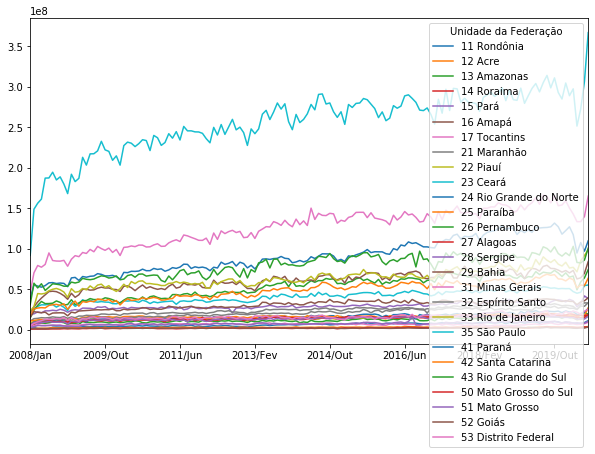

In [32]:
uteis.T.plot(figsize=(10, 6))

## Desafio: Colocar a legenda fora do gráfico

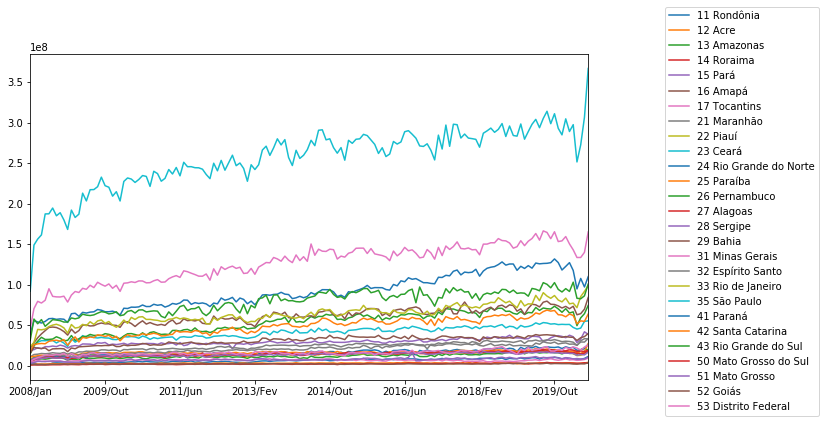

In [33]:
uteis.T.plot(figsize=(10, 6))

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

## Desafio: Escolher 5 estados e plotar os gráficos

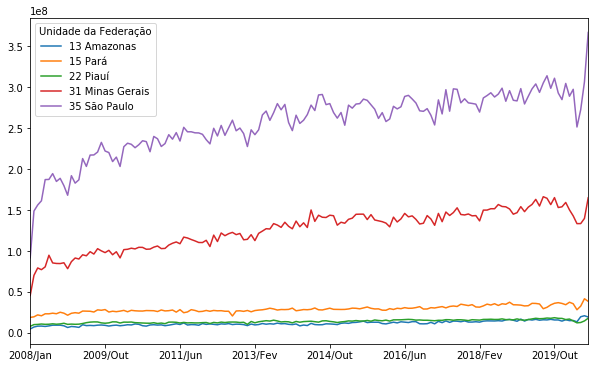

In [34]:
uteis.T[["13 Amazonas", "15 Pará", "22 Piauí", "31 Minas Gerais", "35 São Paulo"]].plot(figsize=(10, 6))

plt.show()

In [35]:
uteis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [36]:
# 5 primeiras colunas da matriz transposta
uteis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [37]:
#valor referente ao índice das 5 primeiras linhas
uteis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [38]:
# 5 primeiras linhas
uteis[:5]

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,36112567.22,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79


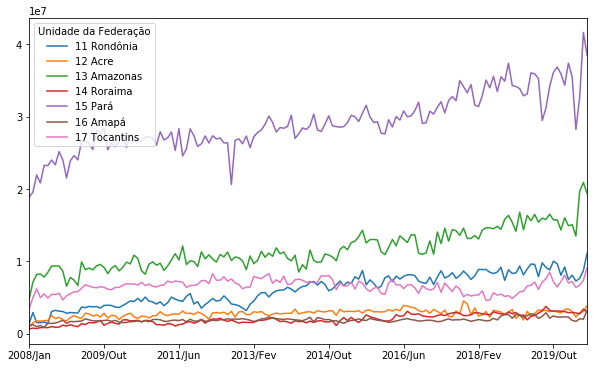

In [39]:
#PLotando o gráfico dos 7 primeiros estados da lista
uteis[:7].T.plot(figsize=(10,6))

In [40]:
import numpy as np

In [41]:
#definindo seed para que o aleatório seja sempre igual, independente da quantidade de vezes que rodamos

# Exemplo simplificado de como funciona aleatoriedade
# pseudo randomness

# seed = 6987
# random = seed / 10, seed = seed * 2 /3


# random ===> 698...... (seed=4658)
# random ==> 465 (seed = 310)
# random ==> 31

np.random.seed(123456)

#a função "sample" retira uma amostra aleatória dos dados
uteis.sample(n=7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,15048607.23,...,17859596.85,19851940.18,18769437.77,22341629.09,20643441.06,22947163.99,21536505.16,19058243.91,22704335.27,25269773.34
28 Sergipe,2780750.11,3676483.16,5051473.61,5046063.36,4741151.56,5401259.63,5521904.44,5238398.50,5187912.19,4584068.70,...,10464026.39,9199453.13,8463411.72,9691241.43,9325631.63,8093465.51,8589154.91,8026929.31,8057935.10,10313262.56
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30
16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,1866748.58,...,2455947.45,2310514.38,2296699.42,2333822.65,2310195.65,1842472.54,1705873.64,2065055.35,2009912.57,3249565.87
50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,...,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92
42 Santa Catarina,16504913.45,25651429.11,26743524.89,27181488.26,26845308.18,29909762.04,30789135.84,31250854.33,30019676.93,31957603.59,...,67946962.52,62694674.96,62332394.92,60158459.38,63618122.76,61740647.35,51544849.24,55111547.06,54457911.56,63467828.84


In [42]:
# Incluindo uma coluna "Total"
uteis["Total"] = uteis.sum(axis=1)
uteis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,915239196.51
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,1747197793.40
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,300482785.75
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,36853237.41,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,4369236568.47


In [43]:
#Ordenando os valores:
ordenado_por_total = uteis.sort_values("Total", ascending = False)

ordenado_por_total.index = ordenado_por_total.index.str[3:]
#Eliminando a coluna Total
ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
ordenado_por_total.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,...,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64
Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,...,131578320.06,127090701.66,117896293.89,122349509.69,127000113.31,117308075.66,94599403.51,107503816.77,96977288.37,109658360.43
Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,...,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83
Rio de Janeiro,23025258.52,28394310.93,44567062.94,44054604.82,44911021.15,48056212.24,49872379.35,50912706.60,49270352.76,46434912.38,...,86392490.58,80843671.61,78579849.30,83186258.72,76116203.22,77004637.47,71403516.21,85094073.33,91507444.94,98722687.54


In [44]:
#Eliminando as primeiras colunas e salvando as demais como colunas de interesse para nossa análise:
colunas_de_interesse = ordenado_por_total.columns[6:]
colunas_de_interesse

Index(['2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez',
       '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=144)

In [45]:
ordenado_por_total = ordenado_por_total[colunas_de_interesse]

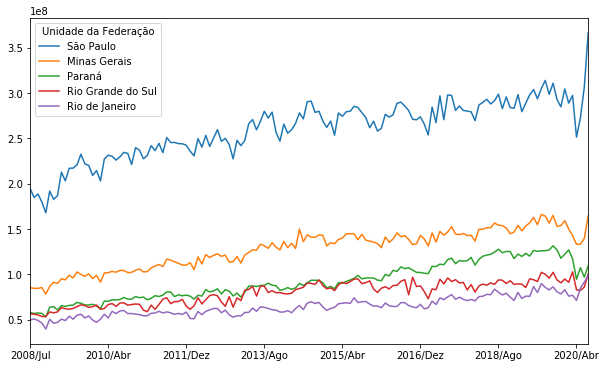

In [46]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

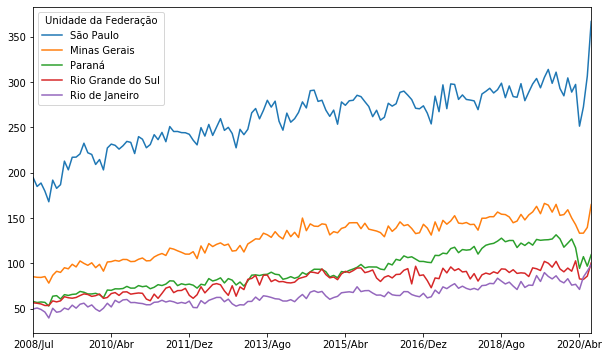

In [47]:
#Melhorando a visualização do eixo Y, exemplo: 35e8 (= 3.500.000.000), vamos dividir todos os valores por 1.000.000
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

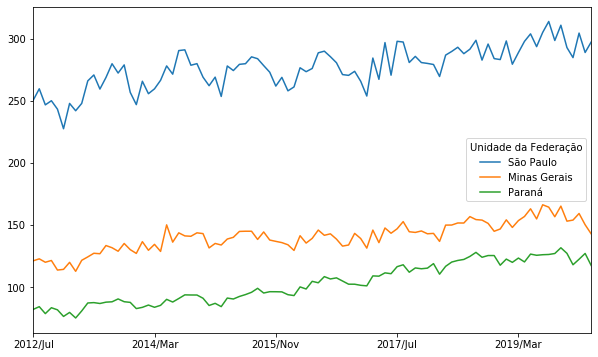

In [48]:
#Podemos plotar somente parte dos meses:
meses_filtrados = ordenado_por_total.columns[47:140]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10, 6))

Verifique que nos dois últimos gráficos o eixo Y não se inicia no zero, com isso pode haver uma má interpretação dos gráficos.
Para evitar comparações errôneas, vamos plotar o gráfico partindo do zero.

(0, 350)

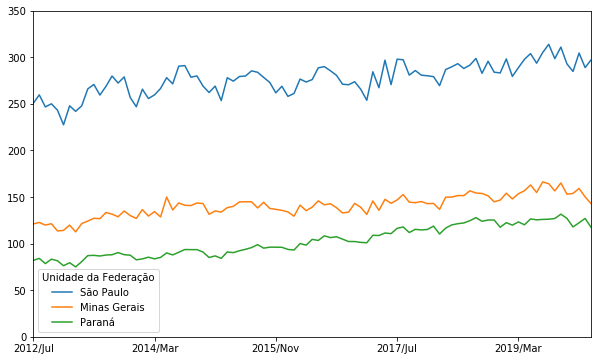

In [49]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10, 6))
plt.ylim(0, 350)

(0, 350)

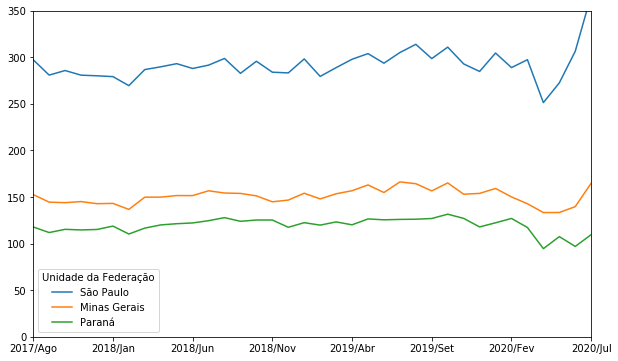

In [50]:
# Podemos plotar somente as últimas 36 colunas:
ordenado_por_total[ordenado_por_total.columns[-36:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

(0, 350)

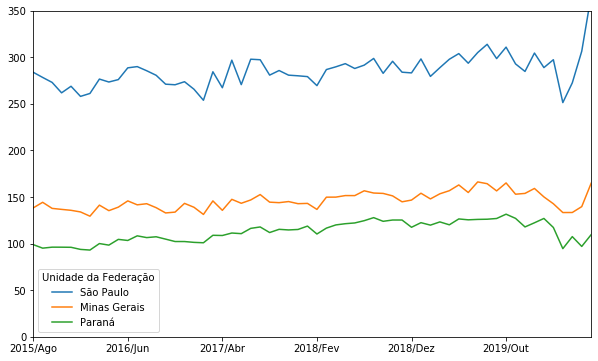

In [51]:
# Ou as últimas 60 colunas:
# Podemos plotar somente as últimas 36 colunas:
ordenado_por_total[ordenado_por_total.columns[-60:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

Vamos analisar o valor do mês mais recente:

In [52]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [53]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           366.72
Minas Gerais        164.89
Paraná              109.66
Rio Grande do Sul   100.53
Rio de Janeiro       98.72
Name: 2020/Jul, dtype: float64

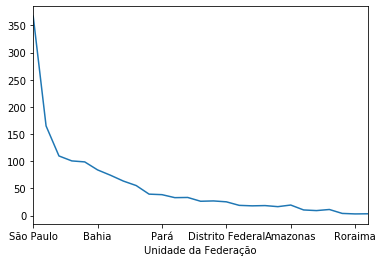

In [54]:
gastos_do_mais_recente.plot()
plt.show()

E se fosse um gráfico de pizza?

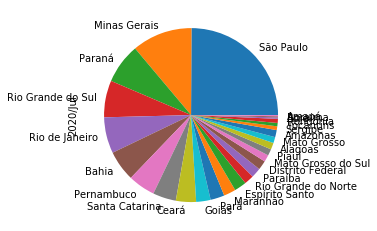

In [55]:
gastos_do_mais_recente.plot(kind='pie')
plt.show()

Desvantagens:
- Legenda está péssima
- Enorme número de fatias

Vantagem:
- O gráfico veio ordenado

E se o gráfico de pizza estivesse desordenado?

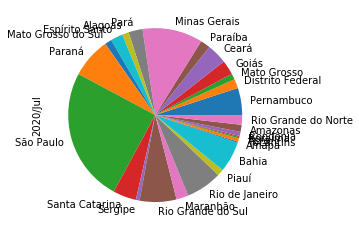

In [56]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')
plt.show()

Desvantagens:
- Legenda está horrível
- Número de fatias inacreditável
- Não dá para saber a ordem
- Cores repetidas
- Péssimo para COMPARAR

In [57]:
# Visualização simples para valores absolutos:
gastos_do_mais_recente

Unidade da Federação
São Paulo             366.72
Minas Gerais          164.89
Paraná                109.66
Rio Grande do Sul     100.53
Rio de Janeiro         98.72
Bahia                  83.99
Pernambuco             74.19
Santa Catarina         63.47
Ceará                  55.18
Goiás                  39.41
Pará                   38.44
Maranhão               32.94
Espírito Santo         33.29
Rio Grande do Norte    26.30
Paraíba                26.90
Distrito Federal       25.27
Mato Grosso do Sul     18.76
Piauí                  17.87
Alagoas                18.35
Mato Grosso            16.37
Amazonas               19.35
Sergipe                10.31
Tocantins               9.13
Rondônia               11.15
Acre                    3.92
Roraima                 3.02
Amapá                   3.25
Name: 2020/Jul, dtype: float64

In [58]:
# Tomando um estado como base para fazer a análise (Minas Gerais), poderemos verificar
# que São Paulo teve mais do que o dobro do gasto

gastos_do_mais_recente / gastos_do_mais_recente.loc["Minas Gerais"]

Unidade da Federação
São Paulo             2.22
Minas Gerais          1.00
Paraná                0.67
Rio Grande do Sul     0.61
Rio de Janeiro        0.60
Bahia                 0.51
Pernambuco            0.45
Santa Catarina        0.38
Ceará                 0.33
Goiás                 0.24
Pará                  0.23
Maranhão              0.20
Espírito Santo        0.20
Rio Grande do Norte   0.16
Paraíba               0.16
Distrito Federal      0.15
Mato Grosso do Sul    0.11
Piauí                 0.11
Alagoas               0.11
Mato Grosso           0.10
Amazonas              0.12
Sergipe               0.06
Tocantins             0.06
Rondônia              0.07
Acre                  0.02
Roraima               0.02
Amapá                 0.02
Name: 2020/Jul, dtype: float64

Plotando o gráfico de barras com os dados que foram ordenados anteriormente a partir da coluna Total:

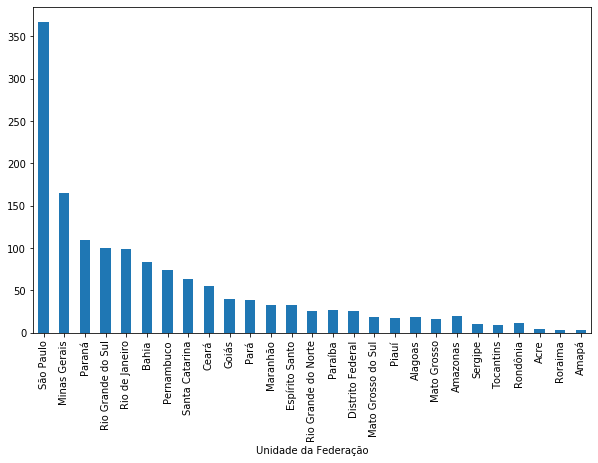

In [59]:
gastos_do_mais_recente.plot(kind='bar', figsize = (10,6))

Podemos observar que alguns estado estão com gasto mais elevado que seu predecessor e seu sucessor no eixo X, isso se deve à ordenação que fizemos anteriormente, considerando a coluna "Total". Agora vamos ordenar e plotar os valores considerando apenas o mês analisado:


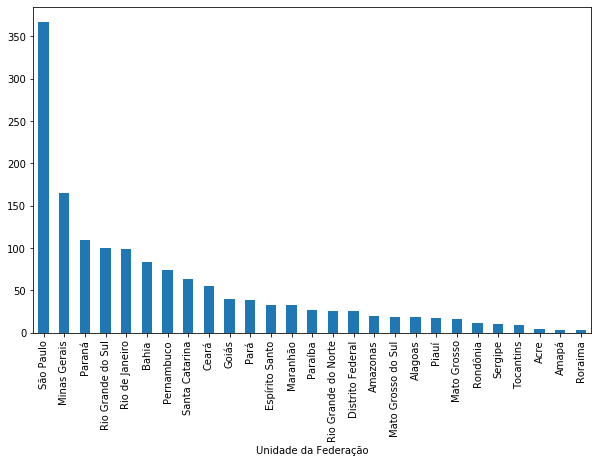

In [60]:
gastos_do_mais_recente.sort_values(ascending=False).plot(kind='bar', figsize = (10,6))

In [61]:
# Ao invés de ver números brutos, vamos ver números relativos, 
# com base no total do país
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()

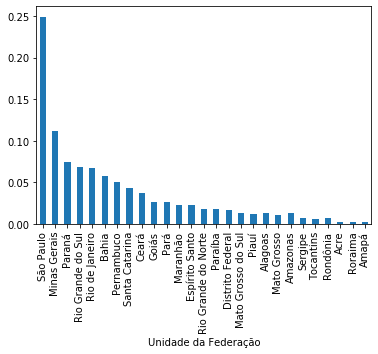

In [62]:
gastos_proporcionais.plot(kind = 'bar')

In [63]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [64]:
# opiando uma tabela 
#(do Wikipedia: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

In [65]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
populacao    27 non-null int32
dtypes: int32(1)
memory usage: 324.0+ bytes


None

In [66]:
populacao.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Go', ' Ma', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='uf')

### Ler direto do Wikipedia

In [67]:
URL_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1'

In [68]:
df_uf_populacao = pd.read_html(io=URL_wiki)[0]
df_uf_populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [69]:
def limpar_unir_dfs(dados1, dados2):
    dados1 = dados1.dropna().copy()
    dados1["populacao"] = dados1["População"].str.replace(" ", "").astype(int)
    dados1["uf"] = dados1["Unidade federativa"]
    dados1 = dados1[["populacao", "uf"]].set_index("uf")
    dados1.index = dados1.index.str.strip()

    for estado in dados2.index:
        dados1.index = dados1.index.str.replace(f"{estado} {estado}", estado)

    return dados1.join(dados2)

In [70]:
#gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente

Unidade da Federação
São Paulo             366.72
Minas Gerais          164.89
Paraná                109.66
Rio Grande do Sul     100.53
Rio de Janeiro         98.72
Bahia                  83.99
Pernambuco             74.19
Santa Catarina         63.47
Ceará                  55.18
Goiás                  39.41
Pará                   38.44
Maranhão               32.94
Espírito Santo         33.29
Rio Grande do Norte    26.30
Paraíba                26.90
Distrito Federal       25.27
Mato Grosso do Sul     18.76
Piauí                  17.87
Alagoas                18.35
Mato Grosso            16.37
Amazonas               19.35
Sergipe                10.31
Tocantins               9.13
Rondônia               11.15
Acre                    3.92
Roraima                 3.02
Amapá                   3.25
Name: 2020/Jul, dtype: float64

In [71]:
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
gastos_e_populacao_recente = limpar_unir_dfs(populacao, gastos_do_mais_recente)

In [72]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
    gastos_do_mes = todos_os_gastos[mes]
    dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
    dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

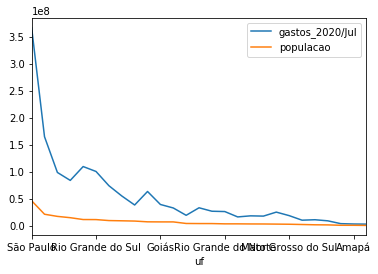

In [73]:
# horripilante (data visualization)
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jul")
gastos_e_populacao_recente[["gastos_2020/Jul", "populacao"]].plot()

In [74]:
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
São Paulo,46289333,366.72,366721243.71,7.92
Minas Gerais,21331292,164.89,164891823.64,7.73
Rio de Janeiro,17366189,98.72,98722687.54,5.68
Bahia,14930634,83.99,83992134.91,5.63
Paraná,11516840,109.66,109658360.43,9.52


In [75]:
gastos_e_populacao_recente["gasto_por_habitante"] = gastos_e_populacao_recente["gastos_2020/Jul"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gasto_por_habitante
uf,,,,,
São Paulo,46289333,366.72,366721243.71,7.92,7.92
Minas Gerais,21331292,164.89,164891823.64,7.73,7.73
Rio de Janeiro,17366189,98.72,98722687.54,5.68,5.68
Bahia,14930634,83.99,83992134.91,5.63,5.63
Paraná,11516840,109.66,109658360.43,9.52,9.52


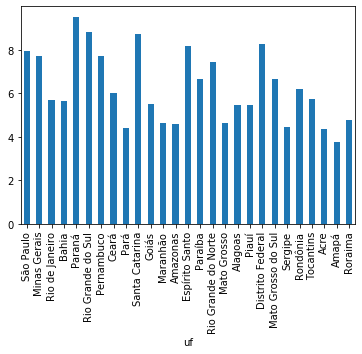

In [76]:
gastos_e_populacao_recente["gasto_por_habitante"].plot(kind='bar')

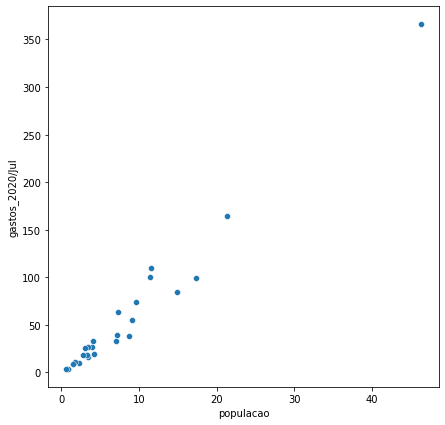

In [77]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x='populacao', y = 'gastos_2020/Jul')
plt.show()

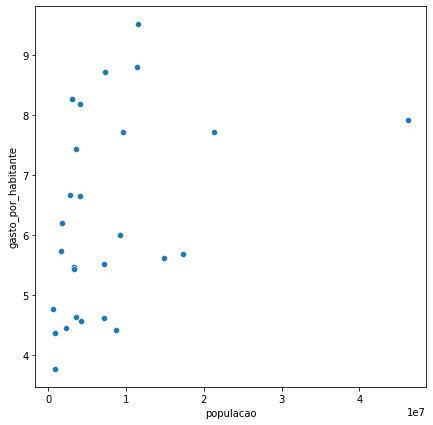

In [78]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente , x='populacao', y = 'gasto_por_habitante')
plt.show()

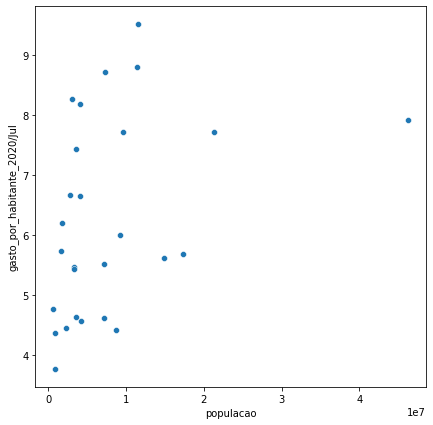

In [79]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jul")

In [80]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Mai")
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gasto_por_habitante,gastos_2020/Jun,gasto_por_habitante_2020/Jun,gastos_2020/Mai,gasto_por_habitante_2020/Mai
uf,,,,,,,,,
São Paulo,46289333,366.72,366721243.71,7.92,7.92,306425499.30,6.62,272486957.70,5.89
Minas Gerais,21331292,164.89,164891823.64,7.73,7.73,139699763.30,6.55,133388804.72,6.25
Rio de Janeiro,17366189,98.72,98722687.54,5.68,5.68,91507444.94,5.27,85094073.33,4.90
Bahia,14930634,83.99,83992134.91,5.63,5.63,69567655.48,4.66,64010810.67,4.29
Paraná,11516840,109.66,109658360.43,9.52,9.52,96977288.37,8.42,107503816.77,9.33


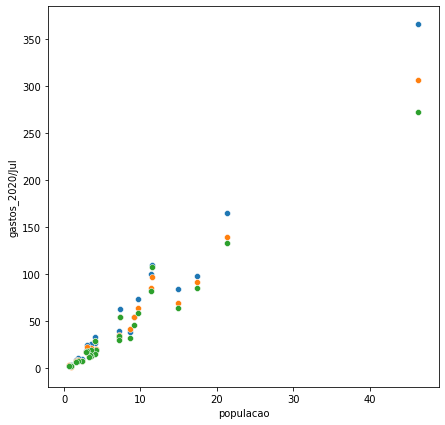

In [81]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jul")
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jun")
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Mai")
plt.show()

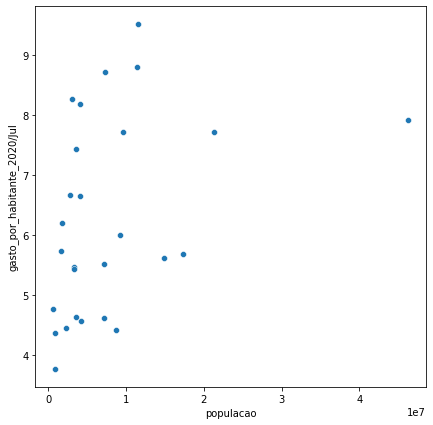

In [82]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jul")

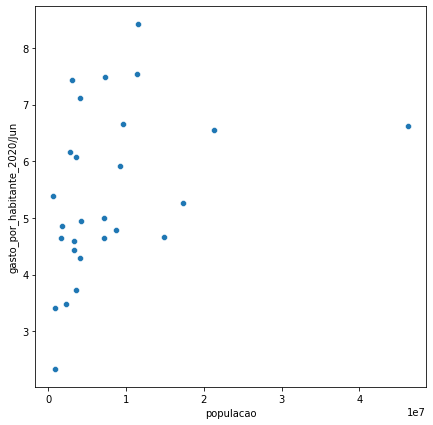

In [83]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jun")

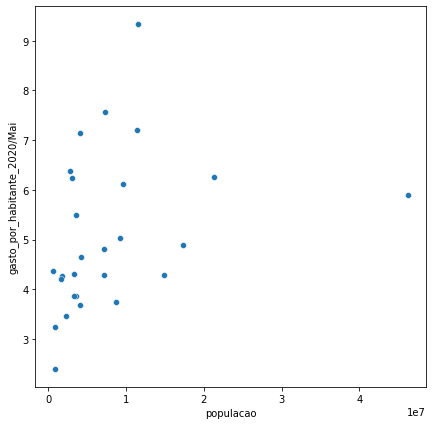

In [84]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Mai")

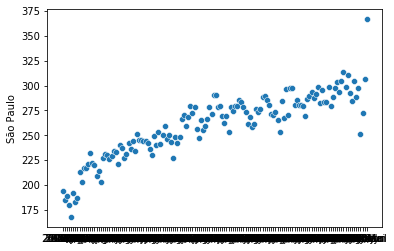

In [85]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])    

In [86]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,194.40,85.36,58.09,56.64,49.87,47.48,32.69,30.79,30.93,20.54,...,11.04,9.89,9.16,9.37,5.52,5.45,3.07,2.51,1.00,1.43
2008/Ago,184.85,84.72,56.98,56.11,50.91,46.93,35.46,31.25,27.85,20.65,...,10.55,9.37,9.24,9.35,5.24,5.41,3.23,2.09,0.89,1.48
2008/Set,188.64,84.60,57.55,55.36,49.27,44.88,33.67,30.02,30.36,20.87,...,10.90,9.56,9.05,9.36,5.19,5.60,3.12,2.28,0.91,1.65
2008/Out,179.71,85.56,57.12,53.64,46.43,41.92,30.58,31.96,27.66,20.62,...,11.72,9.81,9.68,8.62,4.58,4.66,3.07,1.92,1.19,1.87
2008/Nov,167.99,78.33,53.12,53.70,39.91,37.52,31.05,25.12,23.57,17.09,...,10.37,9.48,7.15,6.56,4.10,5.25,2.83,1.76,1.06,1.43


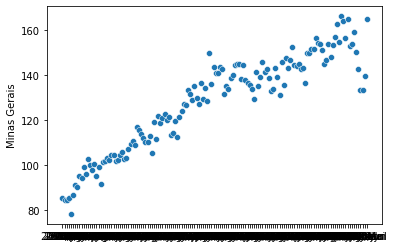

In [87]:
sns.scatterplot(data=mensal, x=mensal.index, y="Minas Gerais")

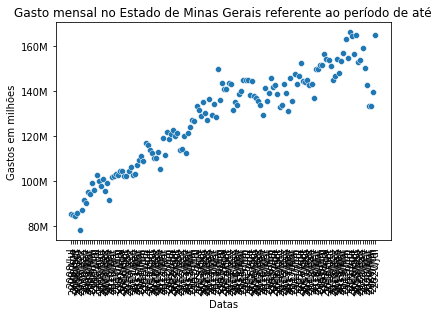

In [88]:
ax = sns.scatterplot(data=mensal, x=mensal.index, y="Minas Gerais")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}M"))
ax.set_title("Gasto mensal no Estado de Minas Gerais referente ao período de até")
ax.set_xlabel("Datas")
ax.set_ylabel("Gastos em milhões")
plt.xticks(rotation = 90)
plt.show()

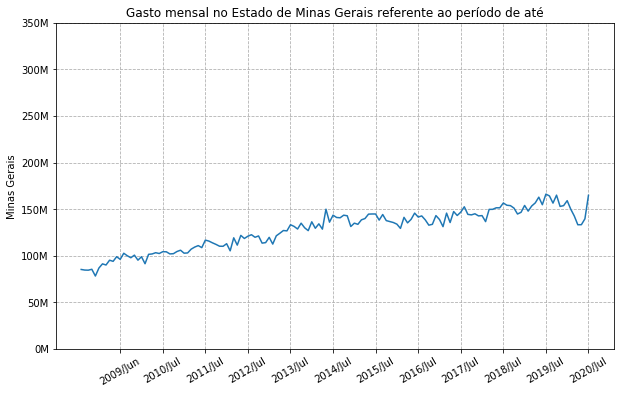

In [89]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}M"))
ax.set_title("Gasto mensal no Estado de Minas Gerais referente ao período de até")
plt.xticks(rotation=30)
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle="--")
plt.show()

In [90]:
from datetime import date 

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()


Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-07-01,194.40,85.36,58.09,56.64,49.87,47.48,32.69,30.79,30.93,20.54,...,11.04,9.89,9.16,9.37,5.52,5.45,3.07,2.51,1.00,1.43
2008-08-01,184.85,84.72,56.98,56.11,50.91,46.93,35.46,31.25,27.85,20.65,...,10.55,9.37,9.24,9.35,5.24,5.41,3.23,2.09,0.89,1.48
2008-09-01,188.64,84.60,57.55,55.36,49.27,44.88,33.67,30.02,30.36,20.87,...,10.90,9.56,9.05,9.36,5.19,5.60,3.12,2.28,0.91,1.65
2008-10-01,179.71,85.56,57.12,53.64,46.43,41.92,30.58,31.96,27.66,20.62,...,11.72,9.81,9.68,8.62,4.58,4.66,3.07,1.92,1.19,1.87
2008-11-01,167.99,78.33,53.12,53.70,39.91,37.52,31.05,25.12,23.57,17.09,...,10.37,9.48,7.15,6.56,4.10,5.25,2.83,1.76,1.06,1.43


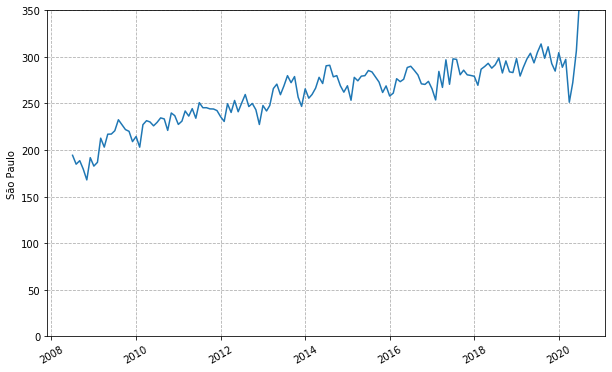

In [91]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()


In [92]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 2008-07-01 to 2020-07-01
Data columns (total 27 columns):
São Paulo              144 non-null float64
Minas Gerais           144 non-null float64
Paraná                 144 non-null float64
Rio Grande do Sul      144 non-null float64
Rio de Janeiro         144 non-null float64
Bahia                  144 non-null float64
Pernambuco             144 non-null float64
Santa Catarina         144 non-null float64
Ceará                  144 non-null float64
Goiás                  144 non-null float64
Pará                   144 non-null float64
Maranhão               144 non-null float64
Espírito Santo         144 non-null float64
Rio Grande do Norte    144 non-null float64
Paraíba                144 non-null float64
Distrito Federal       144 non-null float64
Mato Grosso do Sul     144 non-null float64
Piauí                  144 non-null float64
Alagoas                144 non-null float64
Mato Grosso            144 non-null float64
Amaz

In [93]:
mensal.index[0]

datetime.date(2008, 7, 1)

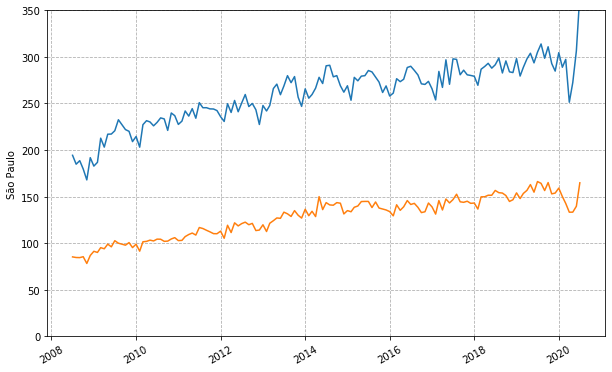

In [94]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

# Problemas:
# 1. eixos
# 2. legenda
# 3. linhas do gráfico..

In [95]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-07-01,194.40,85.36,58.09,56.64,49.87,47.48,32.69,30.79,30.93,20.54,...,11.04,9.89,9.16,9.37,5.52,5.45,3.07,2.51,1.00,1.43
2008-08-01,184.85,84.72,56.98,56.11,50.91,46.93,35.46,31.25,27.85,20.65,...,10.55,9.37,9.24,9.35,5.24,5.41,3.23,2.09,0.89,1.48
2008-09-01,188.64,84.60,57.55,55.36,49.27,44.88,33.67,30.02,30.36,20.87,...,10.90,9.56,9.05,9.36,5.19,5.60,3.12,2.28,0.91,1.65
2008-10-01,179.71,85.56,57.12,53.64,46.43,41.92,30.58,31.96,27.66,20.62,...,11.72,9.81,9.68,8.62,4.58,4.66,3.07,1.92,1.19,1.87
2008-11-01,167.99,78.33,53.12,53.70,39.91,37.52,31.05,25.12,23.57,17.09,...,10.37,9.48,7.15,6.56,4.10,5.25,2.83,1.76,1.06,1.43


In [96]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns=["dia_mes_ano", "uf", "gasto"]
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-07-01,São Paulo,194.40
1,2008-08-01,São Paulo,184.85
2,2008-09-01,São Paulo,188.64
3,2008-10-01,São Paulo,179.71
4,2008-11-01,São Paulo,167.99


In [97]:
# Do mensal_aberto, chegar no mensal:
mensal_aberto.pivot(index='dia_mes_ano', columns='uf', values='gasto').head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,
2008-07-01,2.51,9.89,1.43,9.37,47.48,30.93,12.57,13.04,20.54,15.78,...,11.04,11.39,56.64,49.87,3.07,1.00,30.79,5.52,194.40,5.45
2008-08-01,2.09,9.37,1.48,9.35,46.93,27.85,13.71,12.59,20.65,15.20,...,10.55,10.64,56.11,50.91,3.23,0.89,31.25,5.24,184.85,5.41
2008-09-01,2.28,9.56,1.65,9.36,44.88,30.36,13.17,12.73,20.87,14.95,...,10.90,11.34,55.36,49.27,3.12,0.91,30.02,5.19,188.64,5.60
2008-10-01,1.92,9.81,1.87,8.62,41.92,27.66,15.05,12.66,20.62,16.07,...,11.72,10.61,53.64,46.43,3.07,1.19,31.96,4.58,179.71,4.66
2008-11-01,1.76,9.48,1.43,6.56,37.52,23.57,11.34,11.46,17.09,14.02,...,10.37,10.74,53.70,39.91,2.83,1.06,25.12,4.10,167.99,5.25


In [98]:
estados_escolhidos = mensal_aberto.uf.unique()[:5]
estados_escolhidos

array(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro'], dtype=object)

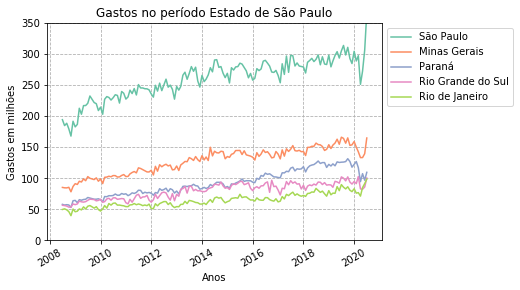

In [99]:
plt.figure()
ax = sns.lineplot(data=mensal_aberto.query('uf in @estados_escolhidos'),
                 x = "dia_mes_ano", y="gasto", hue="uf", palette='Set2')
plt.xticks(rotation=30)
ax.set_title("Gastos no período Estado de São Paulo")
ax.set_xlabel("Anos")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

In [100]:
mensal_aberto["dia_mes_ano"][0]

Timestamp('2008-07-01 00:00:00')

In [101]:
mensal_aberto["dia_mes_ano"].head()

0   2008-07-01
1   2008-08-01
2   2008-09-01
3   2008-10-01
4   2008-11-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [102]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-07-01,São Paulo,194.40,7,2008
1,2008-08-01,São Paulo,184.85,8,2008
2,2008-09-01,São Paulo,188.64,9,2008
3,2008-10-01,São Paulo,179.71,10,2008
4,2008-11-01,São Paulo,167.99,11,2008


In [103]:
mensal_aberto.query("uf=='São Paulo'")

,dia_mes_ano,uf,gasto,mes,ano
0,2008-07-01,São Paulo,194.40,7,2008
1,2008-08-01,São Paulo,184.85,8,2008
2,2008-09-01,São Paulo,188.64,9,2008
3,2008-10-01,São Paulo,179.71,10,2008
4,2008-11-01,São Paulo,167.99,11,2008
...,...,...,...,...,...
139,2020-03-01,São Paulo,297.34,3,2020
140,2020-04-01,São Paulo,251.32,4,2020
141,2020-05-01,São Paulo,272.49,5,2020
142,2020-06-01,São Paulo,306.43,6,2020


In [104]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [105]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-07-01,São Paulo,194.40,7,2008,6.27
1,2008-08-01,São Paulo,184.85,8,2008,5.96
2,2008-09-01,São Paulo,188.64,9,2008,6.29
3,2008-10-01,São Paulo,179.71,10,2008,5.80
4,2008-11-01,São Paulo,167.99,11,2008,5.60


In [106]:
mensal_aberto.dia_mes_ano.dt.strftime("%b")

0       Jul
1       Aug
2       Sep
3       Oct
4       Nov
       ... 
3883    Mar
3884    Apr
3885    May
3886    Jun
3887    Jul
Name: dia_mes_ano, Length: 3888, dtype: object

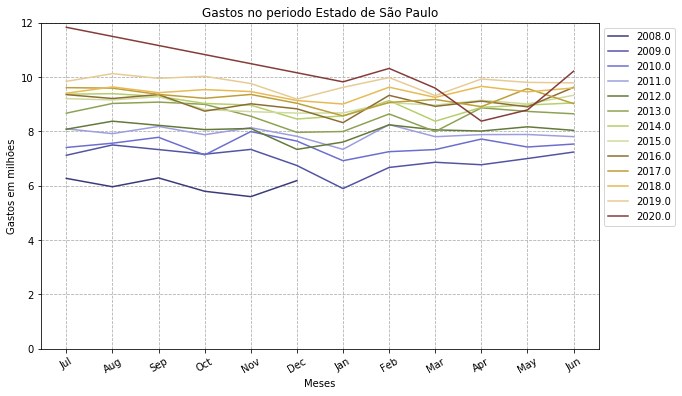

In [107]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data = mensal_aberto.query("uf=='São Paulo'"),
                 x = mensal_aberto.dia_mes_ano.dt.strftime("%b"),
                 y = "gasto_diario", hue="ano", palette="tab20b")
plt.xticks(rotation=30)
ax.set_title("Gastos no periodo Estado de São Paulo")
ax.set_xlabel("Meses")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

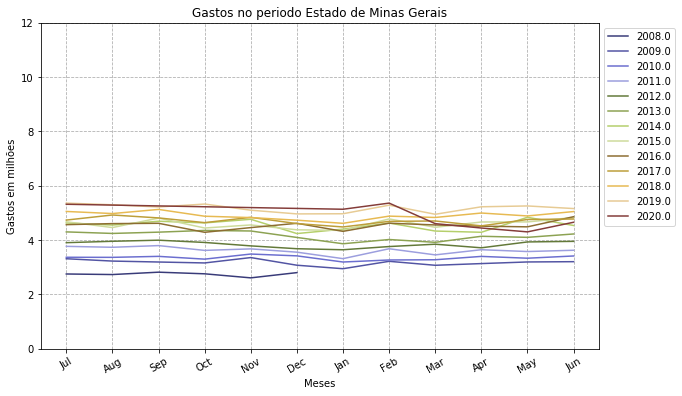

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data = mensal_aberto.query("uf=='Minas Gerais'"),
                 x = mensal_aberto.dia_mes_ano.dt.strftime("%b"),
                 y = "gasto_diario", hue="ano", palette="tab20b")
plt.xticks(rotation=30)
ax.set_title("Gastos no periodo Estado de Minas Gerais")
ax.set_xlabel("Meses")
ax.set_ylabel("Gastos em milhões")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

In [109]:
estado_a_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-07-01,São Paulo,194.40,7,2008,6.27
1,2008-08-01,São Paulo,184.85,8,2008,5.96
2,2008-09-01,São Paulo,188.64,9,2008,6.29
3,2008-10-01,São Paulo,179.71,10,2008,5.80
4,2008-11-01,São Paulo,167.99,11,2008,5.60


In [110]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()

In [111]:
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,1107.44,57,36.11
2009,2324.35,69,76.31
2010,2728.18,78,89.71
2011,2888.08,78,95.00
2012,2928.50,78,96.31


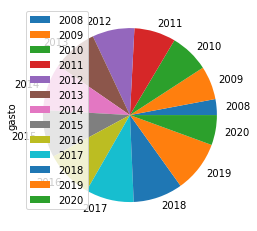

In [112]:
gastos_por_ano.plot(kind='pie', y='gasto')
plt.show()

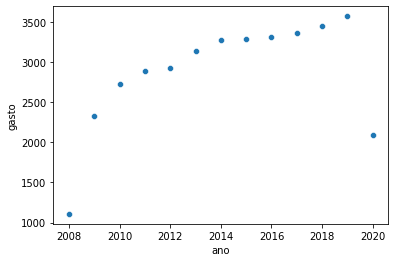

In [113]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")
#limite em y
plt.show()

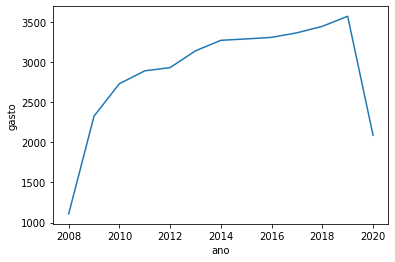

In [114]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")
plt.show()

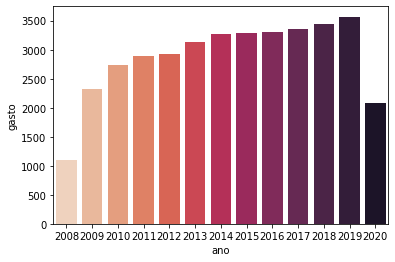

In [115]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto",
           palette=sns.color_palette("rocket_r",13))
plt.show()

In [116]:
# Tom das cores conforme o gasto:
gastos_ordenados = gastos_por_ano['gasto'].rank(method='max').astype(int)
index_ordenados = gastos_ordenados-1
colors = sns.color_palette("rocket_r", 13)
palette = [colors[x] for x in index_ordenados]

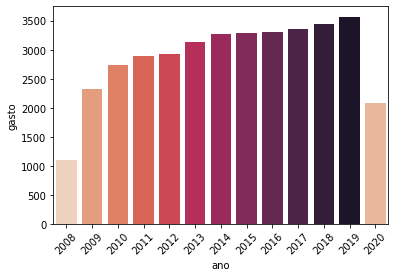

In [117]:
ax = sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto",
           palette=palette)
plt.xticks(rotation = 45)
plt.show()

In [118]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby([ "uf", "ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,505.49,57,16.48
1,Minas Gerais,2009,1063.05,69,34.92
2,Minas Gerais,2010,1223.77,78,40.23
3,Minas Gerais,2011,1321.73,78,43.47
4,Minas Gerais,2012,1402.52,78,46.11


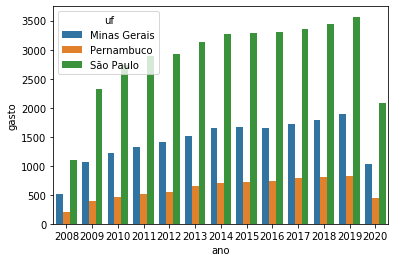

In [119]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")
plt.show()

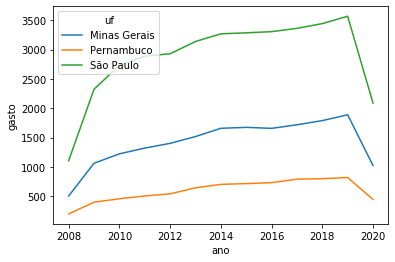

In [120]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")
plt.show()

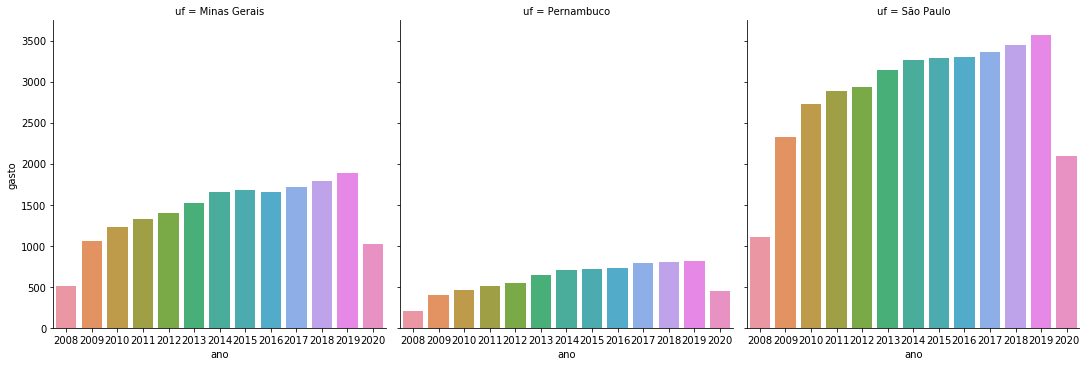

In [121]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", col="uf")
plt.show()

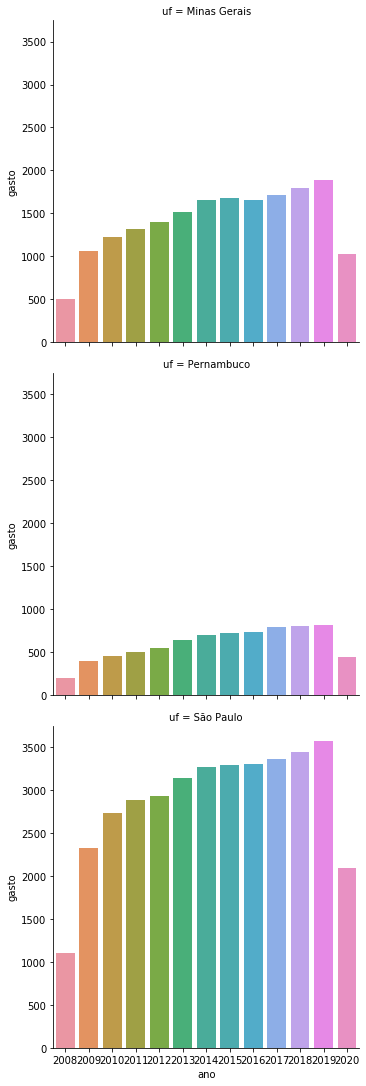

In [122]:
sns.catplot(data=por_ano_dos_estados, x="ano", y="gasto", kind="bar", row="uf")
plt.show()